In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from bs4 import BeautifulSoup
import requests
import json

plt.rc('font', family='Malgun Gothic')

In [250]:
geo_data = 'data/seoul-dong.geojson'
geo_data


'data/seoul-dong.geojson'

In [260]:
search = '서울'

url = 'https://www.google.com/maps/place/' + search

response = requests.get(url)
if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')

else : 
    print(response.status_code)

In [251]:
m = folium.Map(location=[37.5502, 126.982], zoom_start=12)

folium.Marker(location=[37.5502, 126.982], popup="Marker A",
             icon=folium.Icon(icon='cloud')).add_to(m)
folium.Marker(location=[37.5411, 127.0107], popup="한남동",
             icon=folium.Icon(color='red')).add_to(m)



In [217]:
def toInt(a):
    return int(a.replace(',',''))

In [385]:
df1_alt = pd.read_csv("0.dataSet/avg15.09_alt.csv",  thousands=',')
df1_alt = df1_alt.fillna('')

df1_alt.columns = df1_alt.loc[1] + df1_alt.loc[2]
df1_alt = df1_alt.loc[3:]
# df1 = pd.DataFrame(df1, index=df1['구분시도'] +  df1['시군구'])
df1_alt['시도'] = df1_alt['시도'] +  df1_alt['시군구']
df1_alt.index =  df1_alt['시도']

del  df1_alt['시군구']
del  df1_alt['시도']
for i in range(len(df1_alt)):
    df1.iloc[i] = (df1_alt.iloc[i].apply(toInt))
# df1.apply(toInt)
# df1
# df1=df1.astype(float)
df1_alt['시도'] = df1_alt.index
df1_alt = df1_alt.fillna(0)
# df1.fi
# df1[0]

ValueError: cannot reindex from a duplicate axis

In [384]:
# 서울시 중심부의 위도, 경도 입니다.
center = [37.541, 126.986]
rfile = open('0.dataSet/korea.geojson', 'r', encoding='utf-8').read()
# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m = folium.Map(location=center, zoom_start=6)
# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
folium.Choropleth(
    geo_data=rfile,
    data=df1_alt,
    columns=('시도','2013년12월'),
    key_on='feature.properties.CTP_KOR_NM',
    fill_color='BuPu',
    legend_name='가격',
).add_to(m)

# 맵 m을 출력합니다.
m

<AxesSubplot:xlabel='구분시도'>

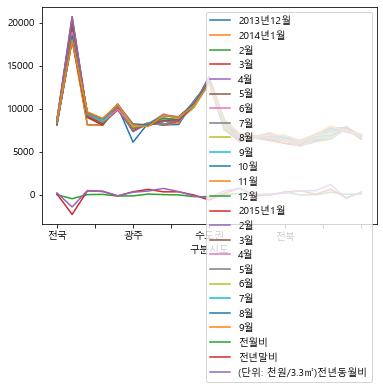

In [376]:
df1 = pd.read_csv("0.dataSet/avg15.09.csv",  thousands=',')
df1 = df1.fillna('')

df1.columns = df1.loc[1] + df1.loc[2]
df1 = df1.loc[3:]
# df1 = pd.DataFrame(df1, index=df1['구분시도'] +  df1['시군구'])
df1['구분시도'] = df1['구분시도'] +  df1['시군구']
df1.index =  df1['구분시도']

del  df1['시군구']
del  df1['구분시도']
for i in range(len(df1)):
    df1.iloc[i] = (df1.iloc[i].apply(toInt))
# df1=df1.astype(float)
df1 = df1.fillna(0)
# df1.fi
# df1[0]
# df1['시도'] = df1.index
df1.plot()

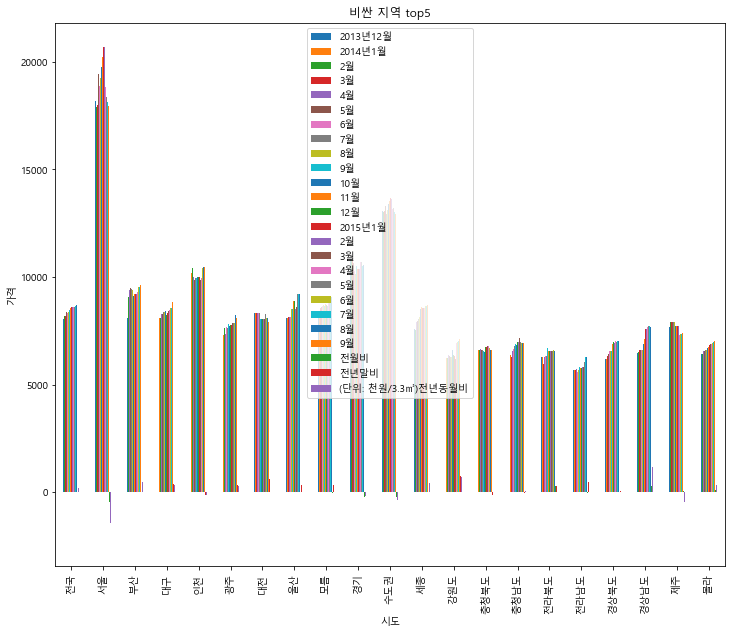

In [295]:
import folium
map_osm = folium.Map(location=[35.166804, 129.083479], zoom_start=12)
df1.plot(kind='bar', figsize=(12,10))
plt.title("비싼 지역 top5")
plt.ylabel("가격")
plt.show()

<AxesSubplot:>

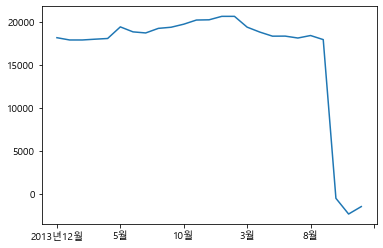

In [280]:
# for i in df1:
#     plt.plot(df1.iloc[1])
# plt.plot(df1)
# dfp.iloc[0].plot()
# dfp.iloc[1].plot()
dfp.loc['서울'].plot()


In [91]:
df1 = df1.fillna(0)
df1.loc['시군구':]
# df1[3:].plot()

2,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비


In [42]:
df2

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226


In [44]:
tempList = []
for value in df2['분양가격(㎡)']:
    try:
        tempList.append(int(value)*3.3)
    except:
        tempList.append(np.nan) # ''
df2['평당분양가격'] = tempList

# df2['평당분양가격'] = df2['분양가격(㎡)']* 33 / 10
df2

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,19400.7
...,...,...,...,...,...,...
2885,제주,전체,2018,7,3334,11002.2
2886,제주,전용면적 60㎡이하,2018,7,NaN,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356,11074.8
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226,10645.8


In [245]:
for i in df2:
    print(df2[i])

0       서울
1       서울
2       서울
3       서울
4       서울
        ..
2885    제주
2886    제주
2887    제주
2888    제주
2889    제주
Name: 지역명, Length: 2890, dtype: object
0                      전체
1              전용면적 60㎡이하
2        전용면적 60㎡초과 85㎡이하
3       전용면적 85㎡초과 102㎡이하
4             전용면적 102㎡초과
              ...        
2885                   전체
2886           전용면적 60㎡이하
2887     전용면적 60㎡초과 85㎡이하
2888    전용면적 85㎡초과 102㎡이하
2889          전용면적 102㎡초과
Name: 규모구분, Length: 2890, dtype: object
0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
2885    2018
2886    2018
2887    2018
2888    2018
2889    2018
Name: 연도, Length: 2890, dtype: int64
0       10
1       10
2       10
3       10
4       10
        ..
2885     7
2886     7
2887     7
2888     7
2889     7
Name: 월, Length: 2890, dtype: int64
0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
2885    3334
2886     NaN
2887    3356
2888    3226
2889    2990
Name: 분양가격(㎡), Length: 2890, dtype